In [17]:
##Parallel Viewers
##Start engines 
##ipcluster start --engines=MPI --n=4
import os
from IPython import parallel
engines = parallel.Client()
#engines = parallel.Client(profile="mpi")
dview = engines[:]
dview.block = True
dview.scatter('id',engines.ids, flatten=True) #common for using data instead of getting the list 

#print(engines.ids)
print('Processes Running:', len(engines))
for view in engines:
    print('Process ID:',view['id'],'PID',view.apply_sync(os.getpid))

('Processes Running:', 2)
('Process ID:', 0, 'PID', 1265)
('Process ID:', 1, 'PID', 1264)


In [18]:
%%px
import os
os.chdir('/Users/Leo/Desktop/MasterThesis/PopulationDynamics/Code/Eulerv2')
#os.chdir('/cluster/home/echeverl/PopulationDynamics')
print(os.getcwd())

[stdout:0] /Users/Leo/Desktop/MasterThesis/PopulationDynamics/Code/Eulerv2
[stdout:1] /Users/Leo/Desktop/MasterThesis/PopulationDynamics/Code/Eulerv2


In [11]:
%%px
from Simulation import *

In [12]:
%%px
#sim = SmallSimulation()
#sim = LargeSimulation()
#sim = HugeSimulation()
#sim = ParallelSimulation('large')
sim = BcastSimulation('large')
#sim = ScatterSimulation('large')

[stdout:0] 
=====Initializing parallel large simulation=====
 INPUT Parameter summary: 
   Number of time steps: NT=1637 
   Plotting interval: NPLT=40 
   Diffusion coeff: Kyb = 2.080000e+02 (in km^2/yr)
   Growth rate: Ryb = 1.670000e-03 (in yr^{-1})
 MAP SIZE: NX=720 (E-W), NY=360 (N-S)
   CELL size: dx=dy = 111.6 (km)=   0.2 (eq. (3) units)
   eq. (3) step size h=5.000000e-02, and CFL number=4.997623e-01 

[stdout:1] 
=====Initializing parallel large simulation=====
 INPUT Parameter summary: 
   Number of time steps: NT=1637 
   Plotting interval: NPLT=40 
   Diffusion coeff: Kyb = 2.080000e+02 (in km^2/yr)
   Growth rate: Ryb = 1.670000e-03 (in yr^{-1})
 MAP SIZE: NX=720 (E-W), NY=360 (N-S)
   CELL size: dx=dy = 111.6 (km)=   0.2 (eq. (3) units)
   eq. (3) step size h=5.000000e-02, and CFL number=4.997623e-01 



[stdout:0] =====Plotting Results=====
[stdout:1] =====Plotting Results=====


[output:0]

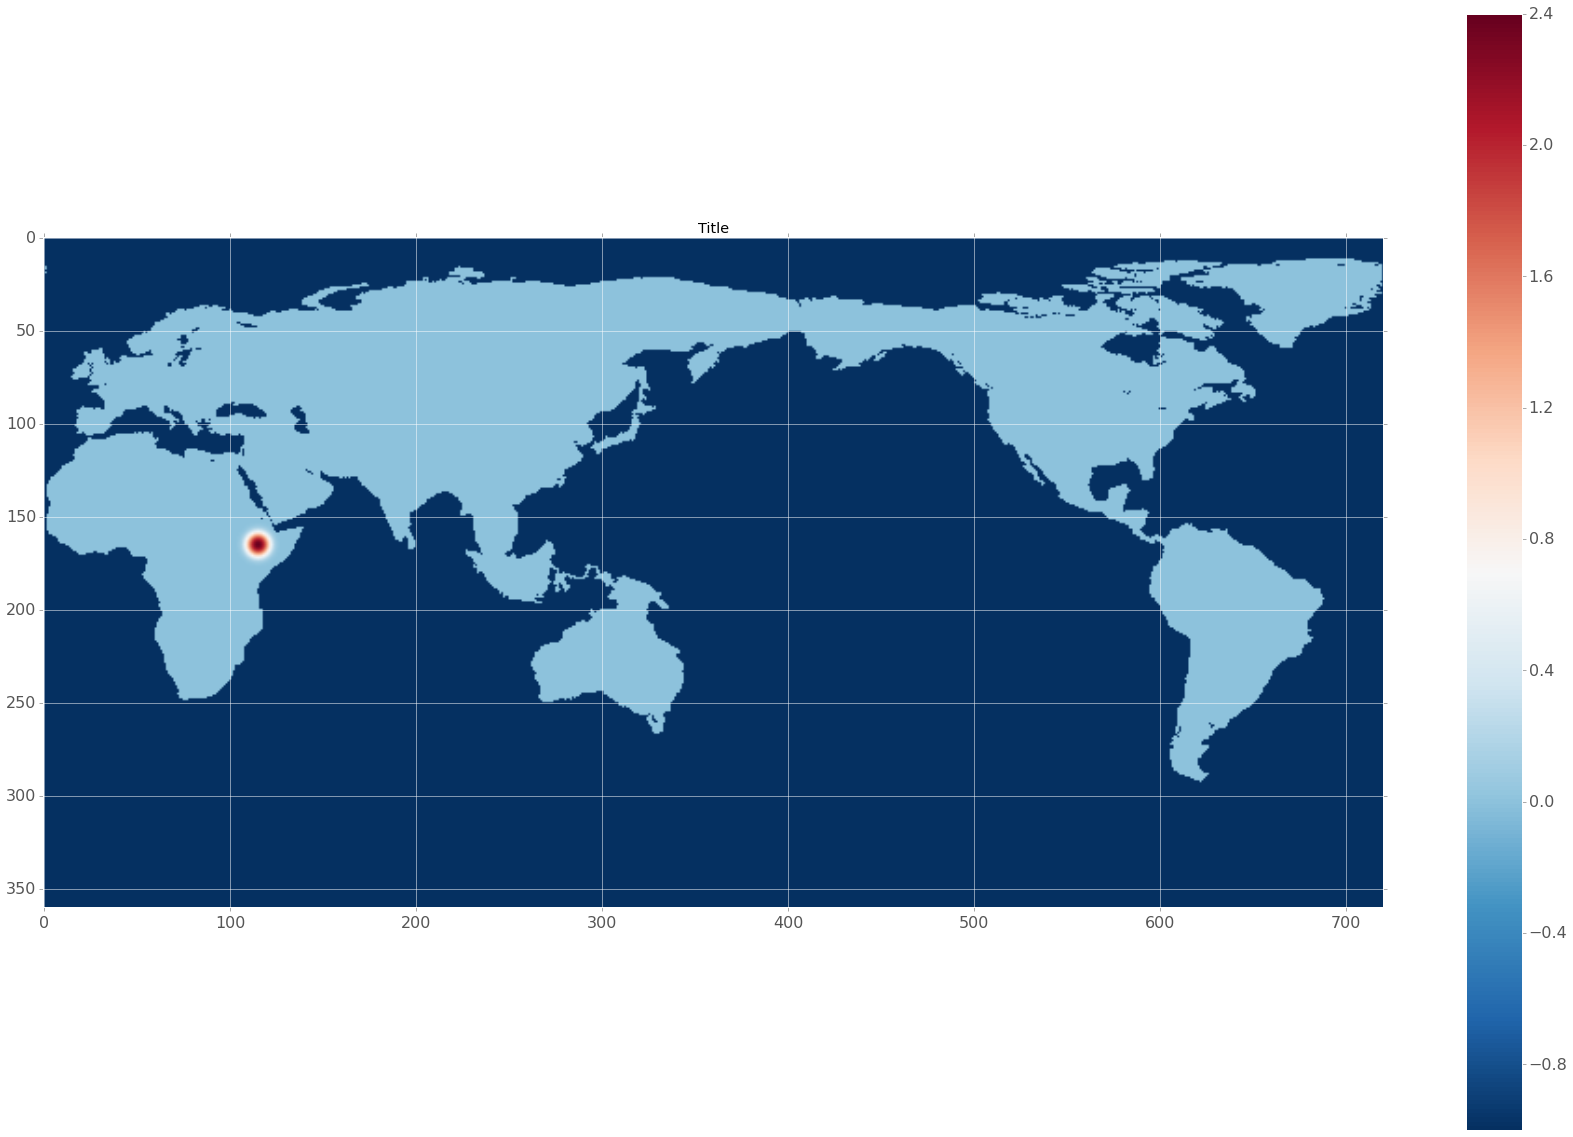

[output:1]

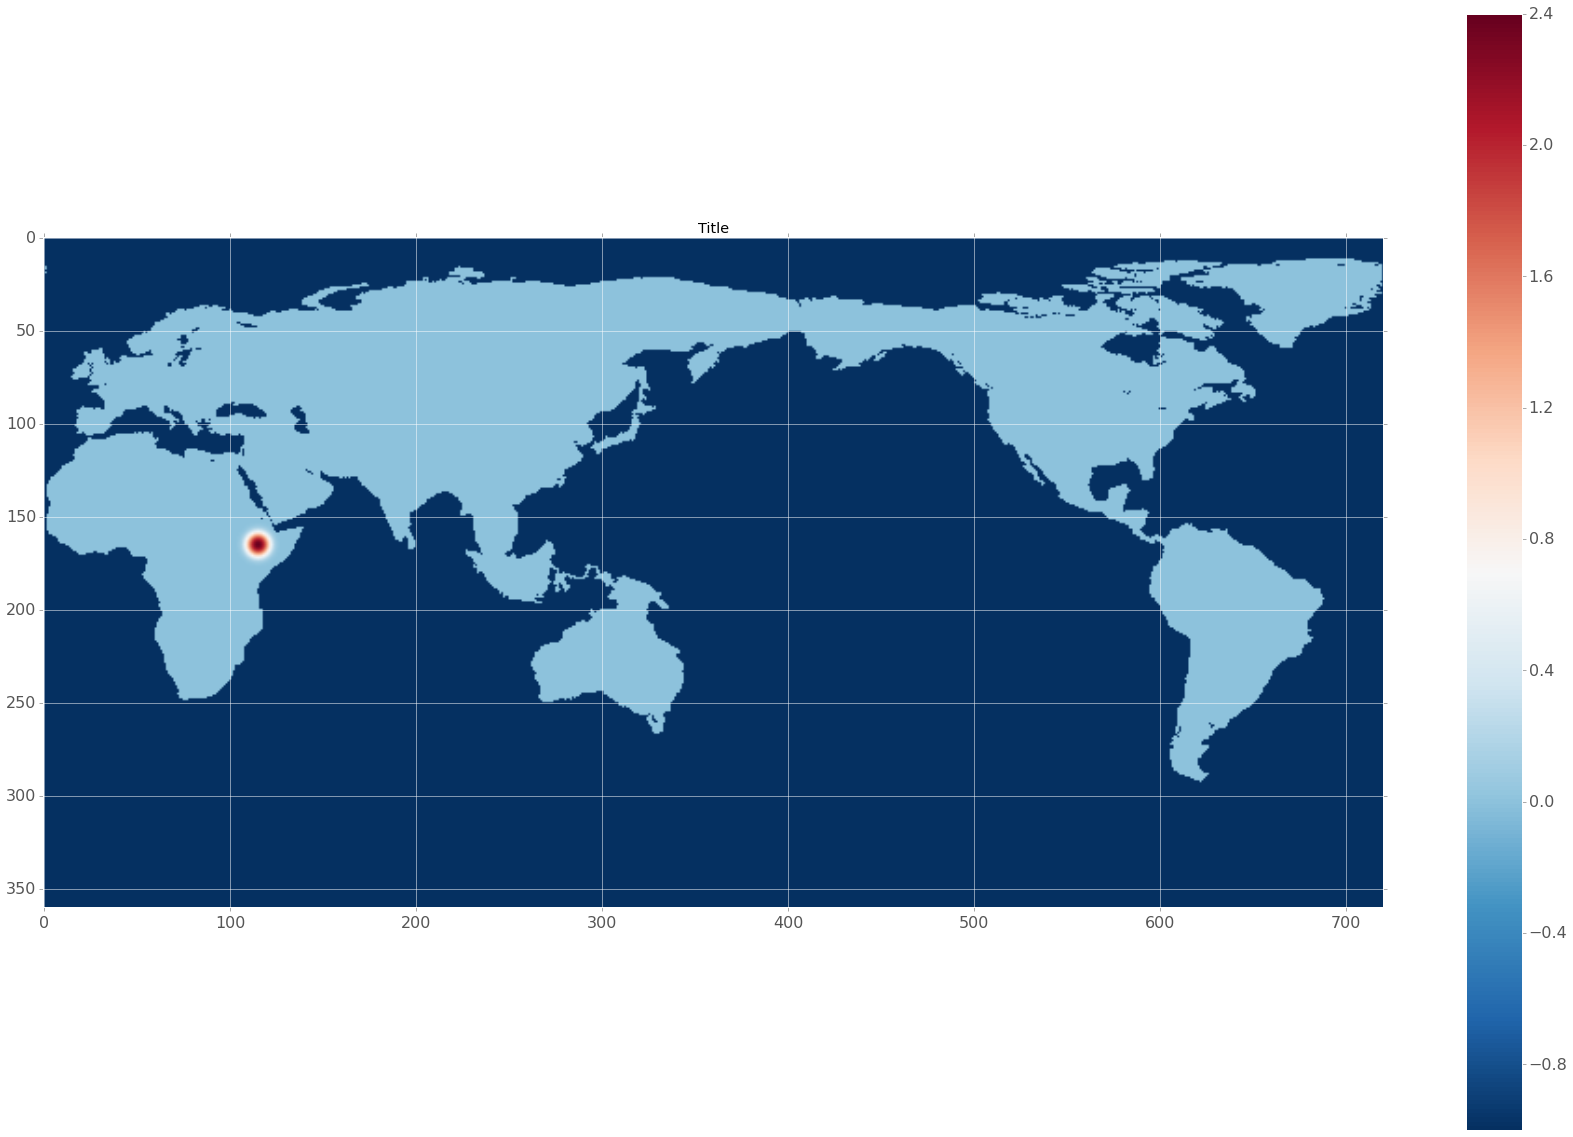

In [13]:
%%px
%matplotlib inline
sim.plot()

In [14]:
%%prun
%%px
sim.run('C')

"""
HDF5: Readers 
         247858 function calls in 22.573 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
       67    7.739    0.116    7.806    0.117 RunBehavior.py:1685(stepY)
       67    5.446    0.081    5.475    0.082 RunBehavior.py:1746(stepX)
      134    4.668    0.035    4.790    0.036 RunBehavior.py:1721(step1Y)
      134    3.268    0.024    3.320    0.025 RunBehavior.py:1658(step1X)
        3    0.561    0.187    0.573    0.191 toolsWaves.py:128(Yscan)
        3    0.543    0.181    0.555    0.185 toolsWaves.py:85(Xscan)
"""
"""
Normal 
         3033573 function calls (3026373 primitive calls) in 41.305 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
       67    7.572    0.113    7.636    0.114 RunBehavior.py:397(stepY)
        5    7.055    1.411    9.488    1.898 toolsWaves.py:317(kapepoch)
       67    5.398    0.081    5.426    0.081 RunBehavior.py:458(stepX)
      134    4.607    0.034    4.743    0.035 RunBehavior.py:433(step1Y)
        4    4.109    1.027    4.126    1.031 toolsWaves.py:128(Yscan)
        4    3.996    0.999    4.011    1.003 toolsWaves.py:85(Xscan)
      134    3.263    0.024    3.315    0.025 RunBehavior.py:370(step1X)
       10    2.339    0.234    4.783    0.478 npyio.py:1184(genfromtxt)
"""

KeyboardInterrupt: 

[stdout:0] =====Plotting Results=====
[stdout:1] =====Plotting Results=====


[output:0]

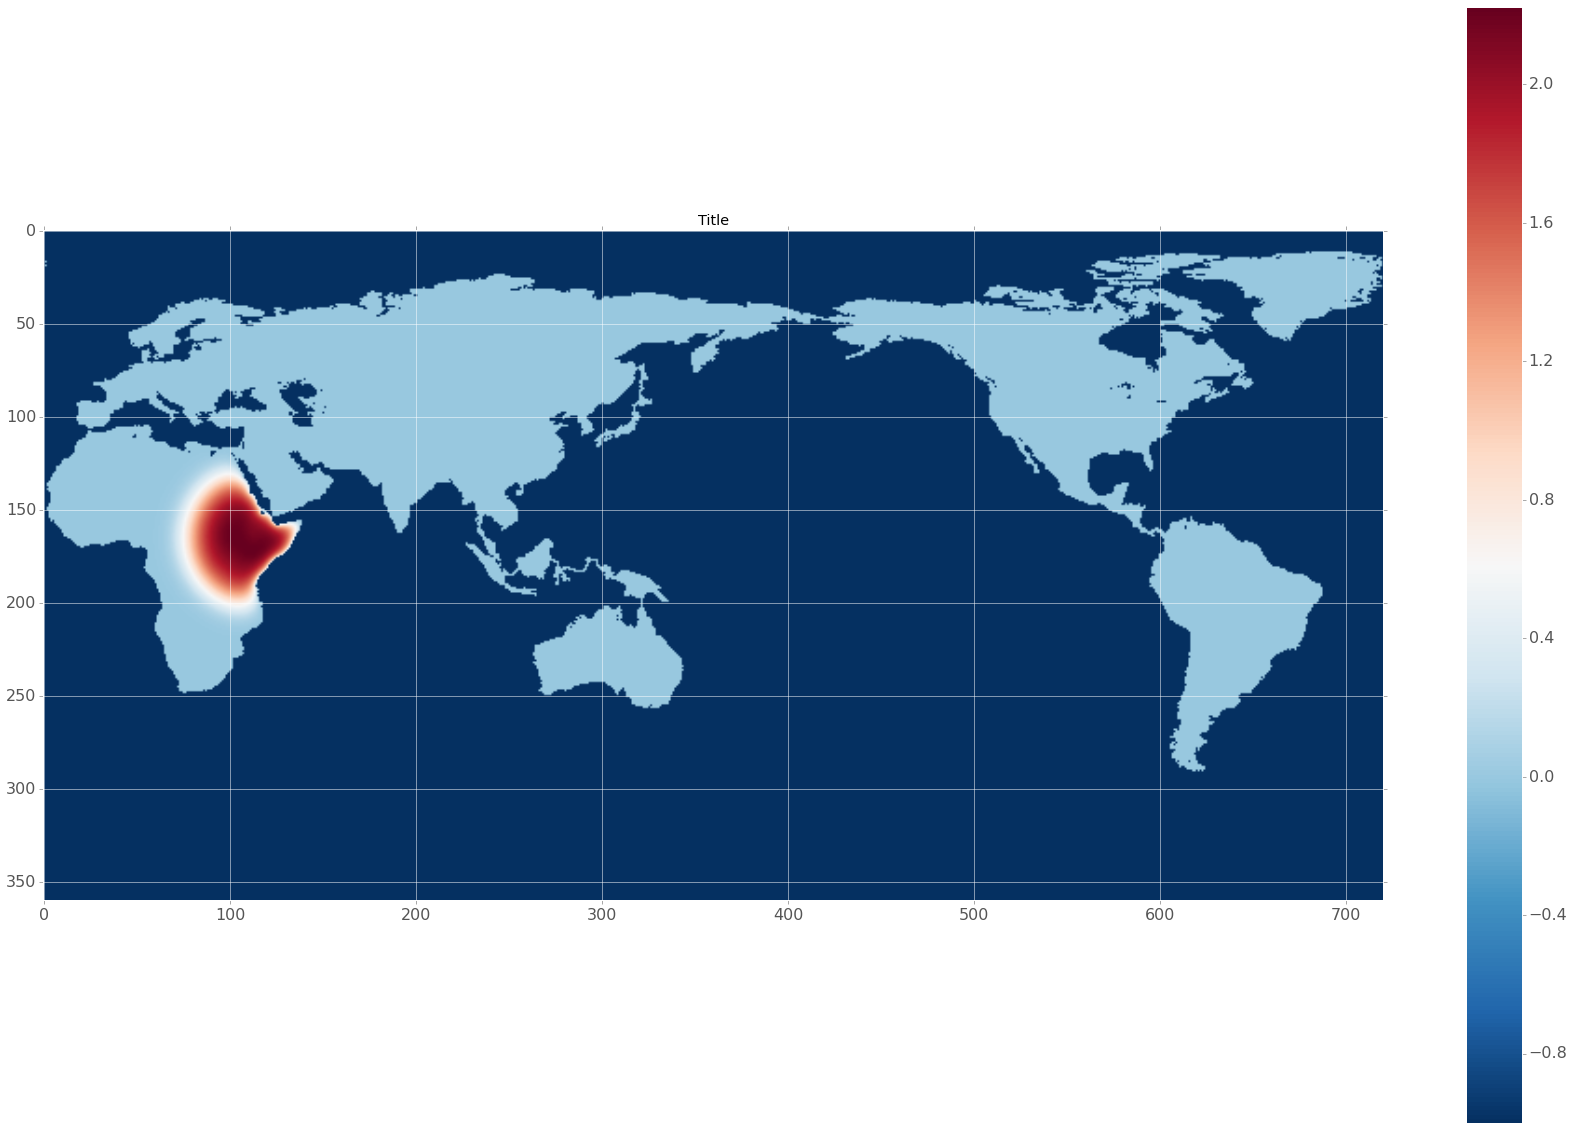

[output:1]

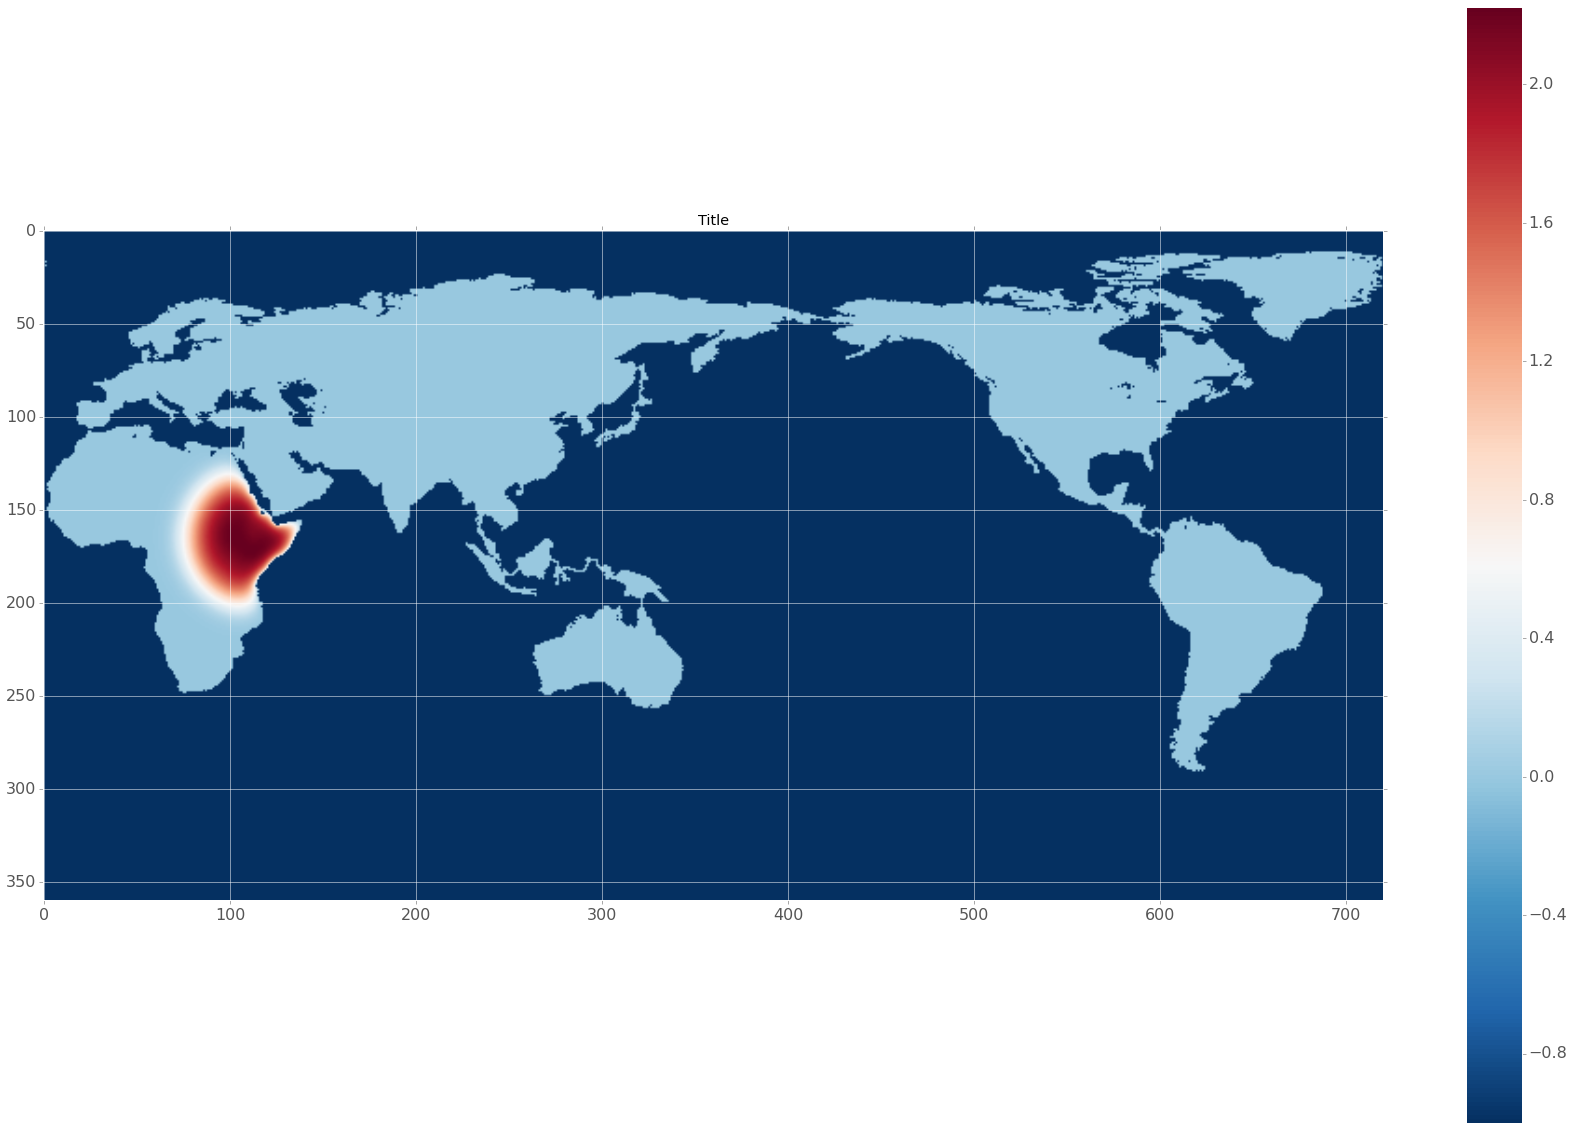

In [7]:
%%px
sim.plot()

In [8]:
%%px
#Small tests 
#Ts = 10
#0.932921077382
#0.0

#Ts = 5
#Max normal: 0.823809712953
#[stdout:0] 
#0.823809712953
#0.0
#[stdout:1] 
#0.823809712953
#0.0

#Max HDF5: 0.82485359287
#[stdout:0] 
#0.82485359287
#0.0
#[stdout:1] 
#0.82485359287
#0.0

#Kew kapepoch
#Sim small:
#0.933195524125
#0.0

#Sim large:
#0.944236788364
#0.0
#Corrected borders
#0.944216196309
#0.0

#Sim huge:
#0.944474993058
#0.0

#Old kapepoch
#Sim Small: 
#0.890545672382
#0.0
#Sim Large:
#C
#0.944236656825
#0.0
#Fortran
#0.944236656825
#0.0
#Old Values
#neumann: 0.937418184803 #dirichlet: 0.890545672382
#neumann:0.0 #dirichlet:0.0
print(sim.data.u.max())  
print(sim.data.u.min()) 

[stdout:0] 
0.82485359287
0.0
[stdout:1] 
0.82485359287
0.0


In [31]:
total = 232.451
stepY=55.065/total
kapepoch=40.818/total
stepX=37.018/total
step1Y=28.918/total
genfromtxt=20.508/total
step1X=20.374/total
Yscan=19.894/total
Xscan=19.688/total
print('StepY:',stepY)
print('Kapepoch:',kapepoch)
print('StepX:',stepX)
print('Step1Y:',step1Y)
print('genfromtxt:',genfromtxt)
print('Step1X:',step1X)
print('Xscan:',Xscan)
print('Yscan:',Yscan)
print(stepY+kapepoch+stepX+step1Y+step1X+Xscan+Yscan)

StepY: 0.23688863459395743
Kapepoch: 0.17559829813595124
StepX: 0.1592507668282778
Step1Y: 0.12440471325139492
genfromtxt: 0.08822504527835974
Step1X: 0.0876485797006681
Xscan: 0.08469742010144073
Yscan: 0.08558362837759355
0.9540720409892838
